In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Ransomware final.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data.drop(columns=['Name','md5'], inplace = True)
#df.drop(columns=['column_name'], inplace=True)
data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272730,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714290,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909090,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [ ]:
data.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [ ]:
data.shape

(138047, 57)

In [ ]:
# the shape of the legit dataset is 41323
# shape of the malware dataset is 96724 sampals
data["legitimate"].value_counts()

legitimate
0    96724
1    41323
Name: count, dtype: int64

In [ ]:
data.duplicated().sum()

0

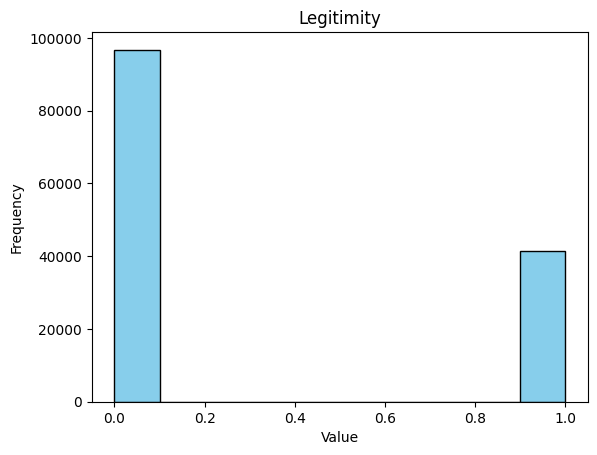

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data["legitimate"], color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.title('Legitimity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# ,"legitimate"#

In [ ]:
data.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
x = pd.DataFrame(data,columns=["Characteristics","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData","ResourcesNb","ResourcesMeanEntropy","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","ResourcesMaxSize",
                   "LoadConfigurationSize","VersionInformationSize"]).values

In [ ]:
y = pd.DataFrame(data["legitimate"]).values

In [ ]:
# y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

**Implementing SMOTE technique**




In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# fitting smote to the train test
smote = SMOTE(random_state=27)
smote_x_train,smote_y_train = smote.fit_resample(x_train,y_train)

In [ ]:
pd.Series(smote_y_train).value_counts()

0    77474
1    77474
Name: count, dtype: int64

In [ ]:
unique_values, counts = np.unique(y_train, return_counts=True)

# Print counts
for value, count in zip(unique_values, counts):
    print(f'{value}: {count}')

0: 77474
1: 32963


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
smote_x_train = scaler.fit_transform(smote_x_train)

In [ ]:
scaler2 = MinMaxScaler()

In [ ]:
x_test = scaler2.fit_transform(x_test)

**Model building
1 - RandamForrest**

In [ ]:
# Random forrest algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clasif = RandomForestClassifier(max_depth=2,random_state=0)
rf_model = clasif.fit(smote_x_train,smote_y_train)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix

In [ ]:
# Accuracy of the train dataset
y_pred = rf_model.predict(smote_x_train)
accuracy_score(smote_y_train,y_pred)

0.9661176652812556

In [ ]:
# accuracy of the test dataset
prediction = rf_model.predict(x_test)
accuracy_score(y_test,prediction)

0.9466135458167331

In [ ]:
f1_score(y_test, prediction)

0.9181202088656816

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# build Confusion Matrix
plot_confusion_matrix = confusion_matrix(y_test, prediction)

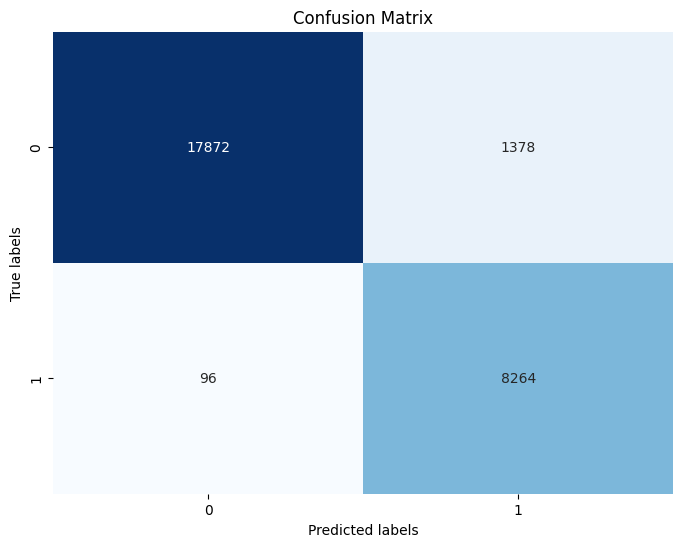

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(plot_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
# Neural Network building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [97]:
# define model
model = Sequential()
model.add(Dense(15,input_dim=15,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary() #print the model summary

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 15)                240       
                                                                 
 dense_26 (Dense)            (None, 5)                 80        
                                                                 
 dense_27 (Dense)            (None, 1)                 6         
                                                                 
Total params: 326 (1.27 KB)
Trainable params: 326 (1.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
 # compile model
model.compile(loss = "binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [99]:
# Fit the model
model.fit(smote_x_train,smote_y_train,epochs=5,batch_size=32)

Epoch 1/5
4843/4843 [==============================] - 14s 3ms/step - loss: 0.5026 - accuracy: 0.7988
Epoch 2/5
4843/4843 [==============================] - 10s 2ms/step - loss: 0.3591 - accuracy: 0.8551
Epoch 3/5
4843/4843 [==============================] - 11s 2ms/step - loss: 0.3359 - accuracy: 0.8624
Epoch 4/5
4843/4843 [==============================] - 11s 2ms/step - loss: 0.3304 - accuracy: 0.8774
Epoch 5/5
4843/4843 [==============================] - 10s 2ms/step - loss: 0.3274 - accuracy: 0.8812


In [100]:
# accuracy on the training dataset
training_accuracy = model.predict(smote_x_train)
training_accuracy =[1 if y>=0.5 else 0 for y in training_accuracy]
accuracy_score(smote_y_train,training_accuracy)

4843/4843 [==============================] - 7s 2ms/step


0.8818958618375197

In [101]:
# Accuracy of the test dataset
y_prediction = model.predict(x_test)
y_prediction =[1 if y>=0.5 else 0 for y in y_prediction]
accuracy_score(y_test,y_prediction)

863/863 [==============================] - 1s 1ms/step


0.8769286490402028

In [102]:
confusion_matrix(y_test,y_prediction)

array([[16946,  2304],
       [ 1094,  7266]])

In [103]:
f1_score(y_test,y_prediction)

0.8104852203011713

In [ ]:
# dicreecing the accuracy by adding voice factor
# aditional part
# noise_factor = 0.2
# x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)


In [51]:
model.save('Function_1_V2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
